In [3]:
pwd

'M:\\IIST\\SEM 1\\DATA MINING\\assign_2'

In [1]:
cd M:\IIST\SEM 1\DATA MINING\assign_2

M:\IIST\SEM 1\DATA MINING\assign_2


### IMPORTING DATA FRAMES REQUIRED

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df2=pd.read_csv("data2.csv",header=None)
df1=pd.read_csv("data1.csv",header=None)
df3=pd.read_csv("data3.csv",header=None)
df4=pd.read_csv("data4.csv",header=None)
df5=pd.read_csv("winequality.csv",header=None,skiprows=1)

# CODE

## LINEAR REGRESSION CODE USNIG GRADIENT DESCENT ALGORITHM

In [291]:
def gradient_descent(df,iteration,lr):
    
    k=list(df.columns)
    
    n=len(k)
    
    p=k[:n-1]
    
    global x
    x=np.array(df[p])
    
    global y
    y=np.array(df[n-1])
    
    eps = 10** -4
    
    global w0
    w0 = 0
    
    global w
    w = [0]*len(p)
    
    global iterationlist
    iterationlist=[]
    
    
    global wlist
    wlist=[]
    
    global w0list
    w0list=[]
    
    global jwlist
    jwlist=[]
 
    global mse_list
    mse_list=[]
 
    
    for i in range(iteration):
        
        iterationlist.append(i)
        
        global y_pred
        y_pred = np.dot(x,w) + w0
        
        #global jw
        jw = (0.5) * np.sum(np.square(y-y_pred))
        
        #global mse
        mse = (1/(len(df))) * np.sum(np.square(y-y_pred))
        mse_list.append(mse)
        
        jwlist.append(jw)
        
        w0d =  np.sum(y_pred-y)
        
        wd =   np.dot((y_pred-y),x)
        
        
        
        w = w - lr*np.array(wd)
        
        wlist.append(w)
        
        
        
        w0 = w0 - lr*np.array(w0d)
        
        w0list.append(w0)
        
        std1=np.std(y-y_pred)
        
        if i== (iteration-1):
            #print("w0:{} w:{} mse:{}".format(w0,w,mse))
            return w0,w,mse,std1

## LINEAR REGRESSION BY USING GRADIENT DESCENT ALGORITHM WITH K FOLD CROSS VALIDATION TECHNIQUE

### Gradient_Descent with KFold

In [4]:

def gradient_descent_KFold(x,y,iteration,lr):
    
    x = np.array(x)
    y = np.array(y)
    
    n=len(x)
    
    eps = 10** -5
    
    global w0
    w0 = 0
    
    global w
    w = [0]*len(p)
    
    global iterationlist
    iterationlist=[]
    
    
    #global wlist
    #wlist=[]
    
    #global w0list
    #w0list=[]
    
    global jwlist
    jwlist=[]
 
    global mse_list
    mse_list=[]
 
    
    for i in range(iteration):
        
        iterationlist.append(i)
        
        global y_pred
        y_pred = np.dot(x,w) + w0
        
        #global jw
        jw = (0.5) * np.sum(np.square(y-y_pred))
        
        global mse
        mse = (1/n) * np.sum(np.square(y-y_pred))
        mse_list.append(mse)
        
        jwlist.append(jw)
        
        w0d =  np.sum(y_pred-y)
        
        wd =   np.dot((y_pred-y),x)
        
        
        
        w = w - lr*np.array(wd)
        
        #wlist.append(w)
        
        
        
        w0 = w0 - lr*np.array(w0d)
        
        #w0list.append(w0)
        
        if i== (iteration-1):
            #return w0,w
            wlist.append(w)
            w0list.append(w0)
            print( "w0:{} w:{} Mse:{}".format(w0,w,mse)  )

### K-Fold Cross_Validation Technique

### Function To Train the Model using K-Fold Cross_Validation Technique

In [5]:
def KFold_cross_validation_train(df,iteration,lr,k):
    print(" Data Set Lenght : {} " .format(len(df)))
    j=list(df.columns)
    
    n=len(j)
    
    global p
    p=j[:n-1]
    
    global xx
    #x=np.array(df[p])
    xx = df[p]
    
    global yy
    #y=np.array(df[n-1])
    yy = df[n-1]
    
    l = len(df)
    
    
    a=0
    
    
    c= int(l / k)
    
    b=c
    
    global w_new_list
    w_new_list=[]   

    
    global wlist
    wlist=[]
    
    global w0list
    w0list=[]
    
    for i in range(k):
        x1 = xx[0:a]
        x2 = xx[b:l]
        y1 = yy[0:a]
        y2 = yy[b:l]
        x_test = pd.concat([ x1 , x2 ],ignore_index=True)
        y_test = pd.concat([ y1 , y2 ],ignore_index=True)
        
        print(len(x_test))
        print(len(y_test))
        
        gradient_descent_KFold(x_test,y_test,iteration,lr)
        
        a = a+c
        b = b+c
    

### Function Call To Train the model Using K-Fold Cross_Validation Technique 

#### cross_validation_train(Data_Frame_Name , Number_of_iterations , learning_Rate , Number_of_Folds)

### Function To Test the Model using K-Fold Cross_Validation Technique


In [6]:
def KFold_cross_validation_test(df,iteration,lr,k):
    
    print(" Data Set Lenght : {} " .format(len(df)))
    
    j=list(df.columns)
    
    n=len(j)
    
    global p
    p=j[:n-1]
    
    global xx

    xx = df[p]
    
    global yy
 
    yy = df[n-1]
    
    l = len(df)
    
    
    a=0
    
    
    c= int(l / k)
    
    b=c
    
    for i in range(k):
        
        
        print(" ")
        x_train = xx [a:b]
        y_train = yy [a:b]
        print("Lenth of x_train:{}" .format(len(x_train)))
        print("Lenth of y_train:{}" .format(len(y_train)))
        
        
       
            
        global y_pred
        y_pred = wlist[i] * x_train + w0list[i] 
        y_pred = np.sum(y_pred.T)
        a = a+c
        b = b+c
                #print(y_pred)
        print(" ")            
        print("For Kth Fold: {} ".format(i))
        print(" ")
        for j in range(len(x_train)):
            print(" ")
            print(" y_pred:{} y_train:{}" .format(y_pred.iloc[j],y_train.iloc[j]))
                
        #gradient_descent_KFold(x_train,y_train,iteration,lr)
        
        
    


### Function Call To Test the Model using K-Fold Cross_Validation Technique

#### cross_validation_test(Data_Frame_Name , Number_of_iterations , learning_Rate , Number_of_Folds)

# LINEAR REGRESSION USING DIRECT METHOD

In [7]:
def direct_method(df):
    n=len(df.columns)
    k=list(df.columns)
    
    i=len(k)
    
    p=k[:i-1]
    
    global x
    x=np.array(df[p])
    
    
    global y
    y=np.array(df[n-1])
    if n < len(y):
        p=np.dot(x.T,x)
        v=np.linalg.inv(p)
        d=np.dot(v,x.T)
        w=np.dot(d,y)
        return w
    if n > len(y):
        p= np.dot(x,x.T)
        v=np.linalg.inv(p)
        d=np.dot(x.T,v)
        w=np.dot(d,y)
        return w
    if n==len(y):
        p=np.linalg.inv(x)
        w=np.dot(p,y)
        return w


### FUNCTION CALL TO DIRECT METHOD
#### direct_method(Data_Frame_Name)

# Max Min Normatization

In [27]:
def normalisation(df):

   
    for i in df.columns:
        pmax=max(df[i])
        pmin=min(df[i])
        df[i]= np.array((df[i]-pmin)/(pmax-pmin))
   
  
    return df

## Hold_Out Cross Validation techniques

In [294]:
def holdout_method(df,iteration,alpha): # holdout method algorithm ,spliting the 80% data into training and iterating it 30 times
    msecollect=[]
    iteration=iteration
    learning_rate=alpha
    
    for i in range(30):
            df=df.sample(frac=1)
            df1=df[0:int(0.8*len(df))]
            gradient_descent(df1,iteration,learning_rate)
            msecollect.append(mse)
    sum2=np.sum(msecollect) 
    avgmse=sum2/len(msecollect)
    print(avgmse)    
        

#                                       ASSIGNMENT

### Ques 1. Analyze data1 using linear regression

In [154]:
df1=pd.read_csv("data1.csv",header=None)
df1

,0,1
0,0.109660,1.13380
1,1.128700,4.70060
2,-0.289960,-0.26487
3,1.261600,5.16540
4,0.475420,2.41400
...,...,...
195,0.475860,2.41550
196,1.412200,5.69280
197,0.022608,0.82913
198,-0.047869,0.58246


In [157]:
gradient_descent(df1,1000,0.0001)

(0.750002870736552, array([3.50000186]), 4.859193062785611e-09)

### (a) Plot J(w) against iteration

Text(0.5, 1.0, ' J(w) against Iteration ')

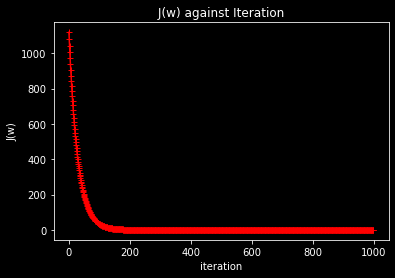

In [158]:
plt.style.use("dark_background")
plt.plot(iterationlist,jwlist,color='r',marker='+')
plt.xlabel("iteration")
plt.ylabel("J(w)")
plt.title(" J(w) against Iteration ")


### (b) Plot J(w) against w for data1

Text(0.5, 1.0, ' J(w) against w0 ')

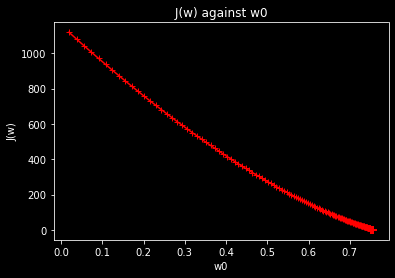

In [159]:
plt.plot(w0list,jwlist,color='r',marker='+')
plt.xlabel("w0")
plt.ylabel("J(w)")
plt.title(" J(w) against w0 ")

Text(0.5, 1.0, ' J(w) against w1 ')

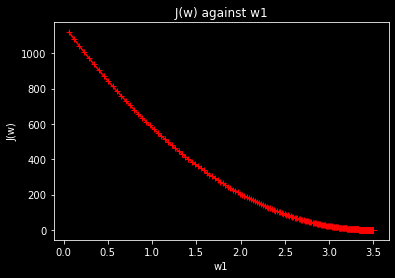

In [160]:
plt.plot(wlist,jwlist,color='r',marker='+')
plt.xlabel("w1")
plt.ylabel("J(w)")
plt.title(" J(w) against w1 ")

### (c) Plot the hyperplane obtained. In the same figure, plot the output points also

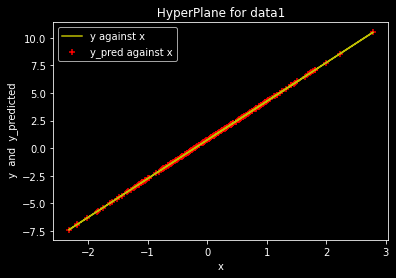

In [161]:
y_pred = w * x + w0

plt.plot(x,y,color="y",label='y against x' )
plt.scatter(x,y_pred,color="r", marker='+',label='y_pred against x')
plt.xlabel("x")
plt.ylabel(" y  and  y_predicted")
plt.title(" HyperPlane for data1 ")
plt.legend()

### (d) Describe the cross validation techniques used.

#### Ans :


####  Data Set 1 :
####  Cardinality or Data Set length : N = 200
####  Number of attributes :  n = 1
####  Dimensions :       x = N*(n+1) = 200 * 2        ;       w= (n+1) * 1 = 2 * 1       ;        y_pred = N * 1 = 200 * 1

####  K_Fold Cross Validation Technique is used with Number of Folds k = 5
####  From the given data set length = 200 
####  80% of data is used to Train the model
####  20% of data is used to Test the model

####  TRAIN THE MODEL :
#### Linear Regression is Performed by using Iterative techniques called Batch Gradient Descent from the 80%  Data = Train Data=160
####  For Each Fold i,e 1 to k (i,e 5 )  The Parameters W and W0 are stored in a list  len(W) = len(W0) = 5
####  Now we found Parameters (W,W0) in each fold , which will be used in testing the 20% Data

#### TESTING THE MODEL :
#### WIth available 20% Data = Test Data = 40
#### Find y_predicted i,e y_pred = (w)Transpose * x + w0
#### As length of x =40 ,SO  lenght of Y_pred = 40
#### Now Compare this Y_pred with Y_test
####  So that we can see the performance of the model
####  How well the Model is performing For the Test Data With which the Model hasn't Trained

#### The Output Results of both Y_pred and Y_train are given in the Output of the Program to compare

### Function Call To Train the model Using K-Fold Cross_Validation Technique 

In [13]:
#cross_validation_train(df,iteration,lr,k)
KFold_cross_validation_train(df1,1000,0.001,5)

 Data Set Lenght : 200 
160
160
w0:0.7500063538430057 w:[3.49999722] Mse:5.084850676901178e-09
160
160
w0:0.750005112356354 w:[3.50000447] Mse:5.1902891261655095e-09
160
160
w0:0.7499981458345524 w:[3.50000018] Mse:3.5648218168720433e-09
160
160
w0:0.750002288725082 w:[3.5000058] Mse:5.53039454272864e-09
160
160
w0:0.750002223411496 w:[3.50000225] Mse:4.845514824279068e-09


### Function Call To Test the Model using K-Fold Cross_Validation Technique

In [14]:
KFold_cross_validation_test(df1,1000,0.001,5)

 Data Set Lenght : 200 
 
Lenth of x_train:40
Lenth of y_train:40
 
For Kth Fold: 0 
 
 
 y_pred:1.1338160492842086 y_train:1.1338
 
 y_pred:4.700453219103683 y_train:4.7006
 
 y_pred:-0.26485284085087746 y_train:-0.26487
 
 y_pred:5.165602850000417 y_train:5.1654
 
 y_pred:2.4139750334586974 y_train:2.414
 
 y_pred:4.85935309301423 y_train:4.8594
 
 y_pred:1.1943310012646793 y_train:1.1943
 
 y_pred:-1.5488618219703352 y_train:-1.5489
 
 y_pred:-4.434889531863708 y_train:-4.4349
 
 y_pred:1.294220922000517 y_train:1.2942
 
 y_pred:3.6149290804835017 y_train:3.6149
 
 y_pred:-0.27405783354657665 y_train:-0.27405999999999997
 
 y_pred:-1.1427571442205378 y_train:-1.1428
 
 y_pred:-0.3302327889709 y_train:-0.33025
 
 y_pred:-3.088090600569025 y_train:-3.0881
 
 y_pred:-0.9755272769199665 y_train:-0.9755299999999999
 
 y_pred:0.11741685581233785 y_train:0.11740999999999999
 
 y_pred:0.9104497265287634 y_train:0.9104399999999999
 
 y_pred:0.5267660309875776 y_train:0.52676
 
 y_pred:2.8896

### (e) Report the average mean square error and standard deviation

#### mean square error : 4.859193062785611e-09

#### Std=6.97078959296185e-05

### (f) Report the parameters of the model.


In [166]:
print(" parameter values are:")
gradient_descent(df1,100,0.001)

 parameter values are:


(0.7500028275758671, array([3.500002]), 4.8591645239580335e-09)

### Ques1. Analyze  data2 using linear regression

In [299]:
df2=pd.read_csv("data2.csv",header=None)
df2

,0,1,2
0,95,125,35
1,583,181,1387
2,575,283,1159
3,292,139,598
4,481,507,429
...,...,...,...
195,564,420,852
196,526,384,810
197,331,21,951
198,374,42,1038


In [300]:
gradient_descent(df2,1000,0.00000004)

(0.001475162275647006,
 array([ 2.99999785, -2.00000213]),
 3.2031594808557734e-07,
 0.0005226537176117105)

### (a) Plot J(w) against iteration.

Text(0.5, 1.0, ' J(w) against Iteration ')

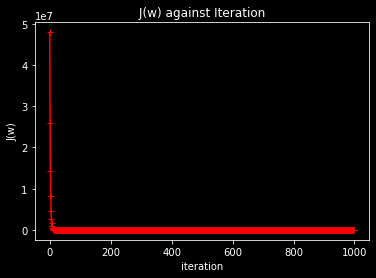

In [301]:
import matplotlib.pyplot as plt
plt.plot(iterationlist,jwlist,color='r',marker='+')
plt.xlabel("iteration")
plt.ylabel("J(w)")
plt.title(" J(w) against Iteration ")

### (c) Plot the hyperplane obtained. In the same figure, plot the output points also.


<IPython.core.display.Javascript object>


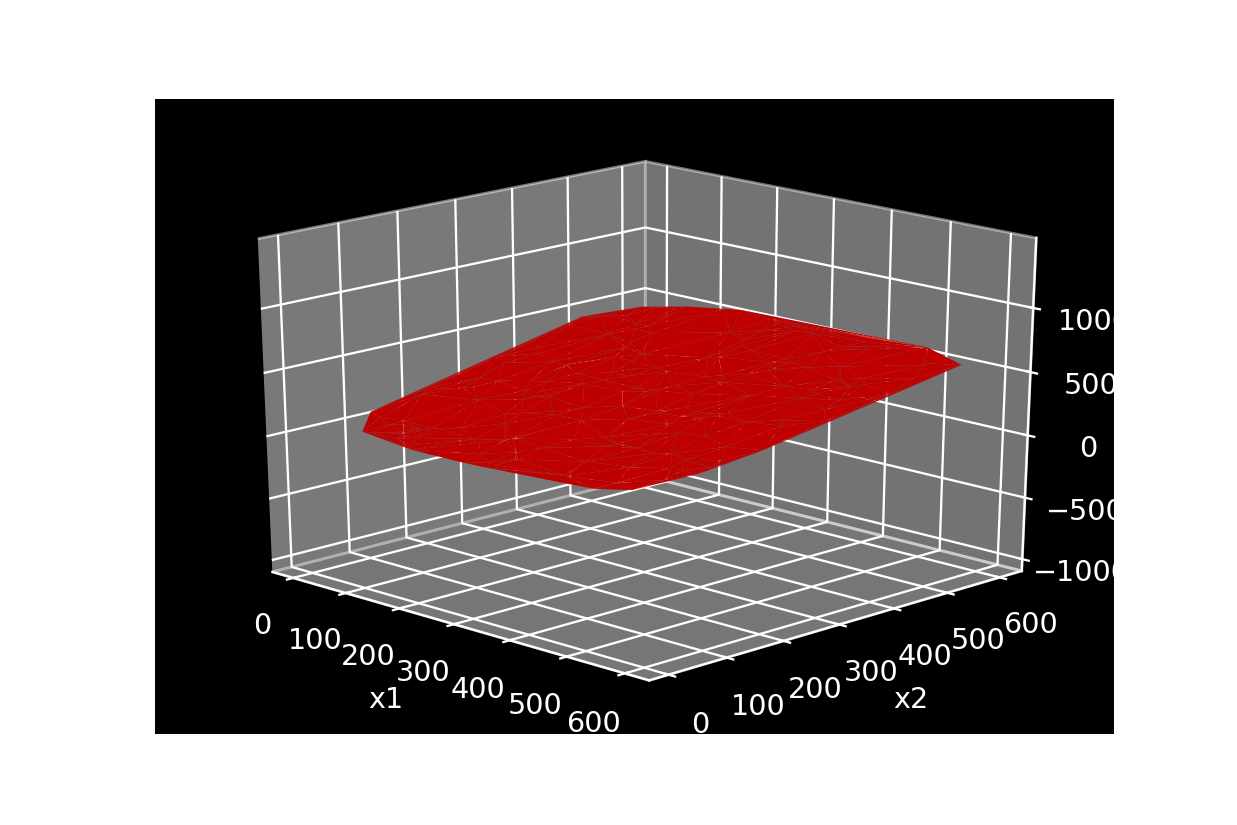

In [302]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['figure.dpi']=150
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot_trisurf(df2[0],df2[1],y_pred,color='red')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

### (d) Describe the cross validation techniques used.



####  Data Set 2 :
####  Cardinality or Data Set length : N = 200
####  Number of attributes :  n = 2
####  Dimensions :       x = N*(n+1) = 200 * 3        ;       w= (n+1) * 1 = 3 * 1       ;        y_pred = N * 1 = 200 * 1

####  K_Fold Cross Validation Technique is used with Number of Folds k = 5
####  From the given data set length = 200 
####  80% of data is used to Train the model
####  20% of data is used to Test the model

####  TRAIN THE MODEL :
#### Linear Regression is Performed by using Iterative techniques called Batch Gradient Descent from the 80%  Data = Train Data=160
####  For Each Fold i,e 1 to k (i,e 5 )  The Parameters W and W0 are stored in a list  len(W) = len(W0) = 5
####  Now we found Parameters (W,W0) in each fold , which will be used in testing the 20% Data

#### TESTING THE MODEL :
#### WIth available 20% Data = Test Data = 40
#### Find y_predicted i,e y_pred = (w)Transpose * x + w0
#### As length of x =40 ,SO  lenght of Y_pred = 40
#### Now Compare this Y_pred with Y_test
####  So that we can see the performance of the model
####  How well the Model is performing For the Test Data With which the Model hasn't Trained

#### The Output Results of both Y_pred and Y_train are given in the Output of the Program to compare

## Function Call To Train the model Using K-Fold Cross_Validation Technique 

In [17]:
#cross_validation_train(df,iteration,lr,k)
KFold_cross_validation_train(df2,1000,0.00000001,5)

 Data Set Lenght : 200 
160
160
w0:0.001512903679533015 w:[ 2.9999978  -2.00000216] Mse:3.4554022340569154e-07
160
160
w0:0.0014469144023904071 w:[ 2.99999788 -2.00000213] Mse:3.3363240845105437e-07
160
160
w0:0.0016417383267511977 w:[ 2.99999755 -2.00000232] Mse:3.7138742711673245e-07
160
160
w0:0.0015220460700879246 w:[ 2.99999777 -2.00000218] Mse:3.213981063885634e-07
160
160
w0:0.0012590597473329122 w:[ 2.99999823 -2.00000186] Mse:2.3584506160554143e-07


## Function Call To Test the Model using K-Fold Cross_Validation Technique


In [18]:
KFold_cross_validation_test(df2,1000,0.00000001,5)

 Data Set Lenght : 200 
 
Lenth of x_train:40
Lenth of y_train:40
 
For Kth Fold: 0 
 
 
 y_pred:35.00254609434643 y_train:35
 
 y_pred:1387.0013491603531 y_train:1387
 
 y_pred:1159.0011462529906 y_train:1159
 
 y_pred:598.0020815149155 y_train:598
 
 y_pred:429.0008691540619 y_train:429
 
 y_pred:24.00258323344761 y_train:24
 
 y_pred:490.002171776784 y_train:490
 
 y_pred:1444.0015905640582 y_train:1444
 
 y_pred:1154.0016801906245 y_train:1154
 
 y_pred:1204.0011894545496 y_train:1204
 
 y_pred:808.0017528589117 y_train:808
 
 y_pred:-1043.998222714365 y_train:-1044
 
 y_pred:1012.0013414455664 y_train:1012
 
 y_pred:1461.001549015732 y_train:1461
 
 y_pred:138.00095225161817 y_train:138
 
 y_pred:189.00075133589462 y_train:189
 
 y_pred:810.0014717297689 y_train:810
 
 y_pred:574.0023606515147 y_train:574
 
 y_pred:872.0018220492685 y_train:872
 
 y_pred:-182.9977331685896 y_train:-183
 
 y_pred:558.0013191467682 y_train:558
 
 y_pred:-255.99735991227624 y_train:-256
 
 y_pred:-22

### (e) Report the average mean square error and standard deviation.


#### mean square error : 3.2031594808557734e-07

In [174]:
print(np.std(y-y_pred))

0.0005226537176117105


#### std : 0.0005226537176117105

### (f) Report the parameters of the model.


In [175]:
print(" parameter values are:")
gradient_descent(df2,1000,0.00000004)

 parameter values are:


(0.001475162275647006,
 array([ 2.99999785, -2.00000213]),
 3.2031594808557734e-07)

### Ques2: Analyze data3 using linear regression


#### (a) Find the parameters using direct method and iterative methods

In [177]:
df3=pd.read_csv('data3.csv',header=None)
df3

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,1.74920,5.35240,1.9048,3.88020,6.25810,-0.81882,0.15429,5.547400,5.03480,8.1049,...,-2.1593,-0.51192,-2.56690,-3.60630,-2.01050,1.87000,-3.94740,-3.95660,3.646400,-6.3990
1,2.56720,0.62960,6.1277,9.17090,8.20650,1.68810,-1.18850,-2.611500,10.97300,-3.3615,...,1.1644,2.45490,7.52300,-3.28330,-0.36977,-2.55980,2.06930,-4.78550,2.174800,36.5410
2,5.24510,-0.81218,4.8901,-0.61827,-0.14016,2.86660,1.31370,8.395400,1.96440,3.2947,...,4.1030,5.25320,4.43210,9.46530,-0.89669,2.97720,-1.92560,0.69556,2.621600,-9.2496
3,0.26811,2.84790,3.3763,5.97190,6.67580,-3.59950,7.57350,0.099107,0.80194,-2.5541,...,8.8078,-4.26590,4.89840,4.74880,8.08550,9.65790,2.23120,-1.70540,-1.014300,-9.6137
4,3.16490,5.86330,8.8108,6.04410,-2.84140,1.55760,7.15950,4.748200,-3.39500,-4.5881,...,-4.6686,-3.18060,4.90400,8.73860,1.34630,9.25870,0.60414,-1.87180,5.360400,6.0652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-2.79630,2.14890,8.8594,-0.94036,4.74310,5.13220,2.75250,8.354000,-4.00710,5.2895,...,4.9511,5.35940,-0.33292,0.60967,1.55470,3.29050,10.13000,3.02670,-4.400600,30.2870
796,-4.31980,-2.28510,3.3545,5.96220,0.46250,7.91490,-3.72390,0.209850,6.11430,6.5968,...,7.3548,-2.32700,2.87490,10.03200,-3.79820,3.35680,1.29950,-1.90100,-0.004131,-1.2650
797,0.93772,-2.36160,-1.6969,7.40660,-4.56800,-2.91120,2.48260,-4.629400,5.00280,6.9308,...,1.9006,10.70300,2.34180,1.14440,7.68360,10.06300,-0.56802,-0.47637,1.081300,-36.0920
798,6.80770,9.59510,-3.2787,6.58890,1.92600,6.13950,6.70350,9.776700,0.83240,8.3612,...,-4.5515,10.86100,-1.75380,8.64750,8.94460,0.91756,-1.02130,-4.23760,-2.314900,-50.1770


In [131]:
direct_method(df3)

array([ 0.09310757, -2.10682807, -0.19724205, -0.35373966,  0.2854454 ,
        0.09588752,  0.54671604,  0.692285  , -0.18641958, -0.21134044,
       -0.6712553 , -0.192262  ,  0.44240955,  1.15903847, -0.6304527 ,
        2.14520606,  0.01552825,  0.1327635 ,  0.02277371, -0.75102492,
        0.5973356 , -0.34103414, -0.03478571,  0.08207365, -0.29841223,
        0.09104487, -1.14462358,  0.10153202,  0.03141346,  0.03070883,
        0.34441512,  0.9178849 , -0.10846267,  0.62473776,  0.05703968,
        0.56453551, -0.17474632,  0.39545945,  0.02829591,  0.26112935,
       -0.12912843,  0.37818224,  0.23465376,  0.47688475,  0.56524095,
        0.06658826,  0.18355772,  0.18277969,  0.15925774, -0.39577749,
        0.27486617, -0.20190807,  0.05936441,  2.24552472, -0.58004898,
       -0.36885051, -0.39111768,  0.01860959,  0.58717613,  0.08037357,
        1.27226064, -0.66023757,  0.65523138,  0.01480391,  0.03709066,
        0.04716515,  1.01057874, -0.17887257,  0.02529794, -0.00

#### Parameters using iterative method ( Gradient Descent iterative method)

In [62]:
gradient_descent(df3,1000,0.000001)

(0.15989214174067923,
 array([ 0.09250802, -2.10562034, -0.19641832, -0.35205565,  0.28577124,
         0.0957374 ,  0.54560709,  0.69164503, -0.18541106, -0.21201196,
        -0.67311597, -0.19285129,  0.44192121,  1.15708132, -0.63073413,
         2.14380163,  0.01553301,  0.13200608,  0.02380999, -0.75300981,
         0.59511108, -0.34153763, -0.03450405,  0.08170065, -0.29960883,
         0.09144054, -1.1425564 ,  0.10036185,  0.03074346,  0.03097076,
         0.34442867,  0.91725474, -0.10884724,  0.62390082,  0.056974  ,
         0.56662107, -0.17540709,  0.39468878,  0.02900727,  0.26265882,
        -0.1301798 ,  0.37679192,  0.23210444,  0.47605074,  0.56612776,
         0.06664002,  0.18331375,  0.17999684,  0.15940563, -0.39419423,
         0.27575858, -0.20303336,  0.05957212,  2.2424814 , -0.57989419,
        -0.36732782, -0.38970175,  0.0176897 ,  0.58595046,  0.07923003,
         1.27186819, -0.66053936,  0.65584372,  0.01515247,  0.03904347,
         0.04919205,  1.01022

#### (b) Compare the time taken and space requirements of two approaches.


#### Time Taken by direct approach

In [63]:
import timeit
%timeit [[direct_method(df3)]]

4.62 ms ± 75.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Time Taken by iterative  approach

In [68]:
#import timeit
%timeit [gradient_descent(df3,100,0.000001)]

10.3 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Space Required by Direct approach

In [ ]:
isspace()

#### Space Required by iterative approach

#### (c) Describe the search space and cross validation techniques used to find the values of the hyperparameters of the model.


In [159]:
len(df3)

800

In [162]:
len(df3.columns)

201


####  Data Set 3 :
####  Cardinality or Data Set length : N = 800
####  Number of attributes :  n = 200
####  Dimensions :       x = N*(n+1) = 800 * 201        ;       w= (n+1) * 1 = 201 * 1       ;        y_pred = N * 1 = 800 * 1

####  K_Fold Cross Validation Technique is used with Number of Folds k = 5
####  From the given data set length = 200 
####  80% of data is used to Train the model
####  20% of data is used to Test the model

####  TRAIN THE MODEL :
#### Linear Regression is Performed by using Iterative techniques called Batch Gradient Descent from the 80%  Data = Train Data=640
####  For Each Fold i,e 1 to k (i,e 5 )  The Parameters W and W0 are stored in a list  len(W) = len(W0) = 5
####  Now we found Parameters (W,W0) in each fold , which will be used in testing the 20% Data

#### TESTING THE MODEL :
#### WIth available 20% Data = Test Data = 160
#### Find y_predicted i,e y_pred = (w)Transpose * x + w0
#### As length of x =160 ,SO  lenght of Y_pred = 160
#### Now Compare this Y_pred with Y_test
####  So that we can see the performance of the model
####  How well the Model is performing For the Test Data With which the Model hasn't Trained

#### The Output Results of both Y_pred and Y_train are given in the Output of the Program to compare

In [69]:
KFold_cross_validation_train(df3_normalized,1000,0.00000001,5)

 Data Set Lenght : 800 
640
640
w0:0.0024822661967478865 w:[0.00125512 0.00114372 0.00129777 0.00119324 0.00132143 0.00129924
 0.00122818 0.00121621 0.00122408 0.00122062 0.00118189 0.00123767
 0.00127062 0.00127938 0.00123679 0.00132011 0.00123289 0.00121174
 0.00123363 0.00117413 0.00126007 0.00121848 0.00120139 0.0012925
 0.00124615 0.0012719  0.00115487 0.00125415 0.00119282 0.00123791
 0.00125195 0.00122083 0.00125535 0.00125866 0.00123948 0.00122376
 0.00126181 0.00124605 0.00125099 0.00127643 0.00120456 0.00124516
 0.00122207 0.00122742 0.00123903 0.00124795 0.00122742 0.00125681
 0.0012452  0.00120339 0.00124954 0.00122364 0.00127655 0.00132423
 0.00124051 0.00124038 0.00122576 0.00121742 0.00124399 0.00122267
 0.00125373 0.00118407 0.00129114 0.00124419 0.00126319 0.00127822
 0.00128351 0.0012338  0.00125467 0.0012177  0.0011646  0.00127205
 0.00115854 0.00128993 0.00125686 0.00124945 0.00124893 0.00118815
 0.00124045 0.00126308 0.00121232 0.00128804 0.00123516 0.00122179
 0.0

In [70]:
KFold_cross_validation_test(df3_normalized,1000,0.00000001,5)

 Data Set Lenght : 800 
 
Lenth of x_train:160
Lenth of y_train:160
 
For Kth Fold: 0 
 
 
 y_pred:0.6253578436507653 y_train:0.417103912196849
 
 y_pred:0.6202069036168106 y_train:0.569130819614091
 
 y_pred:0.6204068011384404 y_train:0.40701150646132056
 
 y_pred:0.6087801139010087 y_train:0.40572242874845105
 
 y_pred:0.6259399570969133 y_train:0.46123278456363953
 
 y_pred:0.6178579357078738 y_train:0.5805735528412109
 
 y_pred:0.6166799054368011 y_train:0.544326429456541
 
 y_pred:0.6174509711678758 y_train:0.5794052044609665
 
 y_pred:0.6224773994490058 y_train:0.20010975393875025
 
 y_pred:0.6223375630551525 y_train:0.35731279872543814
 
 y_pred:0.6190610290647566 y_train:0.4250217737652682
 
 y_pred:0.6126711376197602 y_train:0.38982474774296333
 
 y_pred:0.6262361046036392 y_train:0.5230801911842804
 
 y_pred:0.6191284502339267 y_train:0.3648150115064613
 
 y_pred:0.6231529747855579 y_train:0.423349619401664
 
 y_pred:0.6197960589225011 y_train:0.5812320764737121
 
 y_pred:0.6

### (d) Report the values of the hyperparameters.


### Hyperparameters Tried For a range between 10^-2 to 10^-8

### (e) Report the parameters of the model.



In [482]:
gradient_descent(df3,1000000,0.00000001)

(1.4983434049654,
 array([ 0.09046386, -2.11020815, -0.20125642, -0.35427716,  0.2841442 ,
         0.09324901,  0.54461284,  0.69207336, -0.18959324, -0.2121276 ,
        -0.67664885, -0.19572388,  0.44025743,  1.15663165, -0.6332092 ,
         2.14370642,  0.01374135,  0.13007226,  0.02107402, -0.75211778,
         0.59323248, -0.34492612, -0.03625814,  0.0799886 , -0.29763116,
         0.08737728, -1.14745302,  0.09735791,  0.0284868 ,  0.0287256 ,
         0.34334385,  0.91398852, -0.11053087,  0.62313825,  0.05429628,
         0.5608058 , -0.17872754,  0.39277941,  0.02658697,  0.25990142,
        -0.12645259,  0.37581969,  0.231598  ,  0.47376577,  0.56327154,
         0.06547099,  0.18015373,  0.18037424,  0.15650916, -0.39946012,
         0.27196158, -0.20294804,  0.05561844,  2.24546674, -0.58338921,
        -0.37067133, -0.39126848,  0.0139055 ,  0.585795  ,  0.07610891,
         1.27002541, -0.6612574 ,  0.65235348,  0.01042921,  0.03231044,
         0.04392801,  1.00646147,

### (f) Compare the performance of the two models using statistical techniques.

## Ques3. Analyze data4 using linear regression

### (a) Describe the cross validation techniques used.


In [188]:
df4=pd.read_csv("data4.csv",header=None)
df4

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,47836,20431,74759,10681,58511,44219,38087,14319,26694,36772,...,31070,42,22402,68958,63416,33276,54156,47900,75036,-118500.0
1,63150,1643,8632,1725,28803,21985,72649,50667,18369,76683,...,23519,54290,72179,23853,30416,74502,68129,45171,2777,-780230.0
2,29413,73895,14579,44788,36337,19321,44175,49921,74890,63204,...,71859,61987,35199,24264,6344,11770,61554,9932,30253,-903360.0
3,16483,52296,7928,24066,30912,19452,2636,26236,54656,36150,...,30880,72951,19416,17689,34736,1588,46116,45362,14261,-449080.0
4,6934,74610,39182,75153,62045,12333,4310,64238,76970,26675,...,967,28340,3480,11187,62838,33922,21504,37827,2788,-398170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,26067,49898,38046,12520,15018,10705,57251,79947,64433,37393,...,77787,13526,61179,2675,67725,27647,69518,19906,40329,-1139400.0
146,43716,18916,28997,44965,25755,53718,46220,28433,56069,52536,...,70457,3314,71703,25889,40190,65019,74417,2760,18703,-624190.0
147,31911,14170,63050,55585,32309,45680,34664,3767,69779,23215,...,56367,78590,15092,51605,18322,397,26997,10982,78800,-506500.0
148,33208,66372,62424,34117,43886,13582,70740,17093,4176,60363,...,6669,46792,53882,46743,56964,19019,21694,20013,48451,-290900.0


In [84]:
len(df4)

150

In [85]:
len(df4.columns)

201


####  Data Set 4 :
####  Cardinality or Data Set length : N = 150
####  Number of attributes :  n = 200
####  Dimensions :       x = N*(n+1) = 150 * 201        ;       w= (n+1) * 1 = 201 * 1       ;        y_pred = N * 1 = 150 * 1

####  K_Fold Cross Validation Technique is used with Number of Folds k = 5
####  From the given data set length = 150 
####  80% of data is used to Train the model
####  20% of data is used to Test the model

####  TRAIN THE MODEL :
#### Linear Regression is Performed by using Iterative techniques called Batch Gradient Descent from the 80%  Data = Train Data=120
####  For Each Fold i,e 1 to k (i,e 5 )  The Parameters W and W0 are stored in a list  len(W) = len(W0) = 5
####  Now we found Parameters (W,W0) in each fold , which will be used in testing the 20% Data

#### TESTING THE MODEL :
#### WIth available 20% Data = Test Data = 30
#### Find y_predicted i,e y_pred = (w)Transpose * x + w0
#### As length of x =30 ,SO  lenght of Y_pred = 30
#### Now Compare this Y_pred with Y_test
####  So that we can see the performance of the model
####  How well the Model is performing For the Test Data With which the Model hasn't Trained

#### The Output Results of both Y_pred and Y_train are given in the Output of the Program to compare

In [189]:
df4_normalized=normalisation(df4)
df4_normalized

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.602099,0.248759,0.935526,0.123658,0.740695,0.558660,0.477498,0.178792,0.331300,0.463069,...,0.381181,0.000000,0.275047,0.861336,0.793197,0.415464,0.673492,0.588960,0.951948,0.858113
1,0.797408,0.010864,0.090604,0.010024,0.363943,0.277146,0.912103,0.633534,0.226138,0.981879,...,0.285566,0.680226,0.906407,0.294811,0.380341,0.936402,0.850751,0.553877,0.034117,0.435865
2,0.367139,0.925724,0.166590,0.556411,0.459488,0.243416,0.554052,0.624201,0.940112,0.806663,...,0.897674,0.776740,0.437361,0.299974,0.079181,0.143711,0.767342,0.100864,0.383117,0.357296
3,0.202234,0.652236,0.081608,0.293488,0.390689,0.245075,0.031713,0.327883,0.684516,0.454984,...,0.378775,0.914219,0.237174,0.217391,0.434387,0.015050,0.571497,0.556333,0.179987,0.647171
4,0.080450,0.934778,0.480949,0.941685,0.785512,0.154938,0.052763,0.803318,0.966386,0.331817,...,0.000000,0.354834,0.035045,0.135725,0.785965,0.423627,0.259273,0.459467,0.034257,0.679656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.324465,0.621872,0.466434,0.146992,0.189124,0.134325,0.718478,0.999850,0.808019,0.471142,...,0.972738,0.169078,0.766885,0.028813,0.847106,0.344335,0.868372,0.229084,0.511102,0.206680
146,0.549554,0.229576,0.350813,0.558657,0.325289,0.678931,0.579767,0.355369,0.702365,0.667988,...,0.879921,0.041028,0.900369,0.320384,0.502621,0.816574,0.930520,0.008665,0.236409,0.535434
147,0.398998,0.169482,0.785917,0.693405,0.408406,0.577159,0.434455,0.046778,0.875549,0.286840,...,0.701506,0.984928,0.182329,0.643380,0.229035,0.000000,0.328957,0.114362,0.999759,0.610531
148,0.415539,0.830467,0.777918,0.421017,0.555223,0.170752,0.888098,0.213497,0.046852,0.769733,...,0.072202,0.586207,0.674332,0.582313,0.712477,0.235310,0.261684,0.230460,0.614267,0.748105


In [190]:
KFold_cross_validation_train(df4_normalized,1000,0.0000001,5)

 Data Set Lenght : 150 
120
120
w0:0.0043845971511259985 w:[0.0018771  0.00235655 0.00224366 0.0024664  0.00214409 0.00222267
 0.00235117 0.00214979 0.00232338 0.00217056 0.0022228  0.00216988
 0.00225035 0.00235483 0.00229209 0.00236982 0.00233294 0.0023173
 0.00225091 0.00219959 0.00212299 0.00222118 0.00217256 0.00202903
 0.00209928 0.00227983 0.00236439 0.00188155 0.00242038 0.00222583
 0.00207504 0.00196696 0.00198086 0.0020227  0.00187339 0.00225444
 0.00230656 0.00177826 0.00249913 0.00202929 0.00218718 0.00224871
 0.00218533 0.00201726 0.00212362 0.00208177 0.00234851 0.00209726
 0.00232316 0.00196104 0.00209422 0.00225066 0.00213629 0.00220904
 0.0022563  0.00238172 0.00201813 0.00215366 0.00205609 0.00221831
 0.00218652 0.00208511 0.00221933 0.0021372  0.00252795 0.0023398
 0.00226029 0.00212506 0.00198163 0.00233458 0.00244717 0.0022078
 0.00190844 0.00174782 0.00217137 0.00226045 0.00215362 0.00215998
 0.00214363 0.00226996 0.00207575 0.00210224 0.00201103 0.00221988
 0.001

In [191]:
KFold_cross_validation_test(df4_normalized,10000,0.00000001,5)

 Data Set Lenght : 150 
 
Lenth of x_train:30
Lenth of y_train:30
 
For Kth Fold: 0 
 
 
 y_pred:1.1091949052525745 y_train:0.8581127644911815
 
 y_pred:1.0859013653961636 y_train:0.43586487659205186
 
 y_pred:1.095186920846579 y_train:0.35729600040838205
 
 y_pred:1.093404016923765 y_train:0.6471706781694275
 
 y_pred:1.0913867486874516 y_train:0.6796561933688966
 
 y_pred:1.1030940743612612 y_train:0.6035248474948314
 
 y_pred:1.104257769835828 y_train:0.7326948109956865
 
 y_pred:1.104032554918817 y_train:0.39836391944664234
 
 y_pred:1.0982429711168253 y_train:0.391714949335103
 
 y_pred:1.0794270442373117 y_train:0.4746356466474387
 
 y_pred:1.0976400271868065 y_train:0.5007274305112432
 
 y_pred:1.0902184654549933 y_train:0.4567561703974068
 
 y_pred:1.1026952140572823 y_train:0.6795094310727686
 
 y_pred:1.0988145330126247 y_train:0.1593328058398632
 
 y_pred:1.094324598578642 y_train:0.5622591184052681
 
 y_pred:1.101430002873572 y_train:0.3990658260802981
 
 y_pred:1.097746711

### (b) Describe the method used to find the parameters.


In [192]:
direct_method(df4_normalized)

array([ 0.02618643,  0.03644462,  0.07184135,  0.04279338,  0.11135849,
        0.0755525 , -0.0067849 , -0.00948461,  0.05941125, -0.05161995,
        0.08381129,  0.02011506,  0.03301432,  0.05208218,  0.10282182,
        0.02608357,  0.01496933,  0.13760615, -0.01331554, -0.04206195,
       -0.05203123,  0.03735075, -0.03592582,  0.05812446, -0.00060075,
       -0.00474081,  0.00106134, -0.0735455 ,  0.04367143,  0.02150794,
       -0.02832759, -0.0207988 , -0.02460646, -0.04998553, -0.08435516,
       -0.05741892,  0.01338688, -0.11140435,  0.01319061, -0.04717151,
       -0.00120886,  0.05749328,  0.01775728,  0.00749517, -0.00069784,
       -0.01956835,  0.05404813,  0.01670294,  0.10728236, -0.03301209,
       -0.05919926,  0.0085003 ,  0.04279652, -0.01132609, -0.03383341,
        0.10707248, -0.06814003, -0.04099271, -0.04348215, -0.00927299,
       -0.00360908, -0.01905231, -0.03249939,  0.02517207,  0.0187904 ,
       -0.01340945, -0.02539673,  0.05563285, -0.00401337,  0.11

### (c) Report the values of the parameters of the model.


In [199]:
gradient_descent(df4,10000,0.00001)

(0.028408488505592664,
 array([-0.01030574,  0.03418969,  0.02398565,  0.04415821,  0.0609246 ,
         0.04338255,  0.02005092, -0.01786572,  0.01701777, -0.02970881,
         0.0569712 , -0.02281897,  0.00769494,  0.03259814,  0.07382828,
         0.00513591,  0.00371343,  0.09597255,  0.00252242, -0.03071788,
        -0.0495393 ,  0.02784127, -0.00435424,  0.03088234, -0.02621302,
        -0.00768687,  0.03678709, -0.08301578,  0.02090787,  0.02933804,
        -0.02218743, -0.01581825, -0.05608965, -0.0354468 , -0.04614047,
        -0.00896815, -0.0076159 , -0.08186132,  0.0215497 , -0.01337704,
         0.00685541,  0.04511716,  0.0075846 , -0.00624826,  0.01309032,
        -0.03110099,  0.03796261,  0.02316843,  0.0535337 , -0.03234846,
        -0.02352478, -0.00129217,  0.03071414,  0.01344619,  0.00136381,
         0.06933062, -0.0532721 , -0.0228845 , -0.0144373 ,  0.00250756,
         0.00039794, -0.01782041, -0.00277282,  0.00719318,  0.04837018,
         0.01253204,  0.0093

### (d) Report the average mean square error and standard deviation.


In [200]:
avg_mse = np.mean(mse_list)
print(avg_mse)

0.01022965857027944


In [201]:
std=np.std(y-y_pred)
print(std)


0.04857330463414661


## Ques:4. Analyze Wine quality data set using linear regression (download data from UCI web repository)

### (a) Analyze the data with normalization and without normalization.

In [202]:
df6 =pd.read_csv('winequality.csv',header=None,skiprows=1)
df6


,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [226]:
gradient_descent(df6,10000,0.0001)

(0.5407800555554853,
 array([ 0.06718371, -0.31701839, -0.03782658,  0.05227645, -0.22075078,
         0.06064083, -0.18238542, -0.05836576, -0.09727041,  0.30699806,
         0.35491125]),
 0.016671086676918086)

In [229]:
avg_mse=np.mean(mse_list)
print(avg_mse)

0.016905940702166767


In [230]:
np.std(y-y_pred)

0.1291165623302685

In [231]:
df6_normalized=normalisation(df6)
df6_normalized

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


In [232]:
gradient_descent(df6_normalized,10000,0.0001)

(0.5407800555554853,
 array([ 0.06718371, -0.31701839, -0.03782658,  0.05227645, -0.22075078,
         0.06064083, -0.18238542, -0.05836576, -0.09727041,  0.30699806,
         0.35491125]),
 0.016671086676918086)

In [233]:
avg_mse=np.mean(mse_list)
print(avg_mse)

0.016905940702166767


In [234]:
np.std(y-y_pred)

0.1291165623302685

### (b) Describe how you applied normalization techniques on training and testing data.

### From the given Data Set  Found the max , min for each and every column and stored them in variables pmax , pmin
### Now divide the data set into training data and testing data
### Now apply normalization seperately for both traning and testing data with the help of pmax and pmin
def normalisation(df):

   
    for i in df.columns:
        pmax=max(df[i])
        pmin=min(df[i])
        df[i]= np.array((df[i]-pmin)/(pmax-pmin))
   
  
    return df


### (c) Apply k fold cross validation and hold out method.


## K_Fold Cross Validation Technique

In [251]:
KFold_cross_validation_train(df6,10000,0.00000001,5)

 Data Set Lenght : 1599 
1280
1280
w0:0.06094671458116376 w:[0.02065262 0.01579005 0.01789505 0.00692555 0.00721473 0.01276403
 0.00782086 0.02889846 0.02709044 0.01233356 0.02192146] Mse:0.2024814645280697
1280
1280
w0:0.05922424928606754 w:[0.01776958 0.01574372 0.0148557  0.00631152 0.00719641 0.0124768
 0.00809392 0.02668626 0.02738947 0.01173219 0.02003132] Mse:0.19310459562774823
1280
1280
w0:0.0601648480417416 w:[0.02015146 0.01572017 0.01757305 0.00676811 0.00739068 0.0125346
 0.00821757 0.02887484 0.02665666 0.01257963 0.02037238] Mse:0.19693923442069022
1280
1280
w0:0.05821380502616128 w:[0.01989397 0.01578958 0.01656865 0.00668128 0.00724503 0.01190881
 0.00815934 0.0293612  0.02615363 0.01209478 0.01836876] Mse:0.18521939643978919
1280
1280
w0:0.06032254262033572 w:[0.02157634 0.01552417 0.0183055  0.00688993 0.00751954 0.01210799
 0.00816103 0.02992801 0.02646773 0.01252799 0.02031071] Mse:0.1978345358060857


In [252]:
KFold_cross_validation_test(df6,10000,0.00000001,5)

 Data Set Lenght : 1599 
 
Lenth of x_train:319
Lenth of y_train:319
 
For Kth Fold: 0 
 
 
 y_pred:0.7235181718831944 y_train:0.4
 
 y_pred:0.7237226738434214 y_train:0.4
 
 y_pred:0.7222517326066 y_train:0.4
 
 y_pred:0.7321825182955424 y_train:0.6
 
 y_pred:0.7235181718831944 y_train:0.4
 
 y_pred:0.7235514510362826 y_train:0.4
 
 y_pred:0.7174190363907567 y_train:0.4
 
 y_pred:0.7146994070250338 y_train:0.8
 
 y_pred:0.7176085914010206 y_train:0.8
 
 y_pred:0.7349393681103646 y_train:0.4
 
 y_pred:0.7143941892791745 y_train:0.4
 
 y_pred:0.7349393681103646 y_train:0.4
 
 y_pred:0.7163709707829282 y_train:0.4
 
 y_pred:0.7284752441010436 y_train:0.4
 
 y_pred:0.7370799816145025 y_train:0.4
 
 y_pred:0.737719810195569 y_train:0.4
 
 y_pred:0.7360981141979493 y_train:0.8
 
 y_pred:0.7275490796624668 y_train:0.4
 
 y_pred:0.7186155116373126 y_train:0.2
 
 y_pred:0.7255104642704283 y_train:0.6
 
 y_pred:0.7286740727084217 y_train:0.6
 
 y_pred:0.7322587721768975 y_train:0.4
 
 y_pred:0.

## Hold Out Cross Validation Technique

In [295]:
holdout_method(df6,10000,0.00000001)

0.19783453580608576


In [298]:
gradient_descent(df6,10000,0.00000001)

(0.07251103749640575,
 array([0.02428294, 0.01902749, 0.02068955, 0.00814059, 0.00886271,
        0.01497106, 0.00979363, 0.03484802, 0.03244248, 0.01487617,
        0.02455769]),
 0.17550495807372465,
 0.1604598318267509)

####  Mean Square error for
#### K_fold Cross validation is 0.17550495807372465

#### Hold out Cross validation is 0.19783453580608576

### (d) Assess the performance of the model.


In [297]:
gradient_descent(df6,10000,0.0001)

(0.5407800555554853,
 array([ 0.06718371, -0.31701839, -0.03782658,  0.05227645, -0.22075078,
         0.06064083, -0.18238542, -0.05836576, -0.09727041,  0.30699806,
         0.35491125]),
 0.016671086676918086,
 0.1291165623302685)

In [255]:
avg_mse=np.mean(mse_list)
print(avg_mse)

0.016905940702166767


In [256]:
np.std(y-y_pred)

0.1291165623302685

### (e) Report search space & the values of the hyperparameters and the parameters of the model.


### hyperparameter 10^-4

In [257]:
gradient_descent(df6,10000,0.0001)

(0.5407800555554853,
 array([ 0.06718371, -0.31701839, -0.03782658,  0.05227645, -0.22075078,
         0.06064083, -0.18238542, -0.05836576, -0.09727041,  0.30699806,
         0.35491125]),
 0.016671086676918086)

### hyperparameter 10^-5

In [258]:
gradient_descent(df6,10000,0.00001)

(0.41317675879494703,
 array([ 0.10875788, -0.24428406,  0.02825643,  0.01284381, -0.09080593,
         0.0433582 , -0.12425074, -0.05104985,  0.03986352,  0.23511143,
         0.37855274]),
 0.017010771138499903)

### hyperparameter 10^-6

In [259]:
gradient_descent(df6,10000,0.000001)

(0.2916034849193102,
 array([ 0.09094878, -0.01483574,  0.10719033,  0.0176734 ,  0.00766509,
         0.03379482, -0.01350934,  0.05449373,  0.121278  ,  0.09527168,
         0.22961534]),
 0.02063684285707668)

### hyperparameter 10^-7

In [264]:
gradient_descent(df6,10000,0.0000001)

(0.26105154460532815,
 array([0.08696452, 0.06115151, 0.07719118, 0.02805255, 0.02974547,
        0.05146651, 0.0308879 , 0.1183063 , 0.11634346, 0.05632919,
        0.09988243]),
 0.025843336522779446)

### hyperparameter 10^-8

In [266]:
gradient_descent(df6,10000,0.00000001)

(0.07251103749640575,
 array([0.02428294, 0.01902749, 0.02068955, 0.00814059, 0.00886271,
        0.01497106, 0.00979363, 0.03484802, 0.03244248, 0.01487617,
        0.02455769]),
 0.17550495807372465)

### (f) Apply batch as well as online optimization algorithms and compare their performance using statistical measures. Compare the time taken by the two algorithms.


## Batch Gradient Descent Alogorithm

In [267]:
gradient_descent(df6,10000,0.0001)

(0.5407800555554853,
 array([ 0.06718371, -0.31701839, -0.03782658,  0.05227645, -0.22075078,
         0.06064083, -0.18238542, -0.05836576, -0.09727041,  0.30699806,
         0.35491125]),
 0.016671086676918086)